# Ajuste de curvas desde una perspectiva probabilística

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> **Objetivos:**
> - Recordar el ajuste de curvas polinomiales.
> - Entender el fenómeno de overfitting en casos prácticos.
> - Explicar los mínimos cuadrados ordinaros mediante el principio de máxima verosimilitud.

> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop - Cap. 3.1.

## 1. Introducción

Al día de hoy todos debemos haber ajustado una línea recta (plano, o hiperplano) de la forma

$$
f(x) = w_1 x^{(1)} + w_2 x^{(2)} + \dots + w_d x^{(d)} = x^T w \qquad \text{(generalmente el primer término es de bias $x^{(1)} = 1$)}
$$

a un conjunto de puntos $\{(x_i, y_i)\}_{i=1}^{N}$, con $x_i\in\mathbb{R}^{d}$ y $y_i\in\mathbb{R}$, y parámetros $w\in\mathbb{R}^{d}$. Esto normalmente se hace bajo el enfoque de mínimos cuadrados, es decir:

$$
\hat{w} = \arg \min_{w} ||y - Xw||^2,
$$
  
donde 
 
$$
  X = \left[\begin{array}{ccc}
  - & x_1^T  & - \\
  - & x_2^T  & - \\
    & \vdots &   \\
  - & x_N^T  & - \\
  \end{array}\right] \in \mathbb{R}^{N \times d}, \qquad y = \left[\begin{array}{ccc}
  y_1 \\
  y_2 \\
  \vdots \\
  y_N \\
  \end{array}\right] \in \mathbb{R}^{N}.
$$

Este modelo es probablemente el más simple, ya que involucra únicamente una combinación lineal de las variables de entrada. Al ser lineal, es un modelo bastante limitado.

Por tanto, podemos extender este tipo de modelos para considerar combinaciones lineales de funciones no-lineales de las variables de entrada, de la forma:

$$
f(x) = w_1 \phi_1(x) + w_2 \phi_2(x) + \dots + w_d \phi_d(x) = \phi(x)^T w \qquad \text{(generalmente el primer término es de bias $\phi_1(x) = 1$)},
$$

donde $\phi = \left[\phi_1, \phi_2, \dots, \phi_d\right] \in \mathbb{R}^d$. De esta manera podemos modelar relaciones mucho más complejas. Este tipo de funciones las seguimos llamando **lineales** puesto que lo son respecto a los parámetros $w$.

En este caso, los parámetros los encontramos como

$$
\hat{w} = \arg \min_{w} ||y - \Phi w||^2,
$$

donde

$$
\Phi = \left[
    \begin{array}{ccc}
    - & \phi(x_1)^T  & - \\
    - & \phi(x_2)^T  & - \\
      & \vdots       &   \\
    - & \phi(x_N)^T  & - \\
    \end{array}
\right] \in \mathbb{R}^{N \times d}.
$$

Una elección común de las funciones $\phi_j(x) = x^{j-1}$, para lograr funciones polinomiales.

In [1]:
# Importamos librerías
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# Generamos datos ficticios
N = 20
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

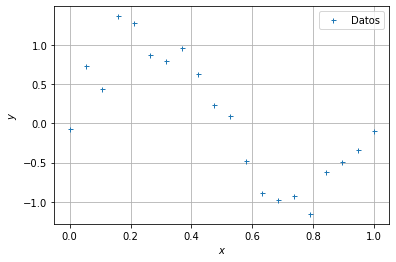

In [7]:
# Gráfica de los datos
plt.plot(x, y, '+', ms=5, label='Datos')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [36]:
# Definición del modelo
d = 3
model = Pipeline(steps=[
    ("poly", PolynomialFeatures(d)),
    ("reg", LinearRegression())
])

In [13]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.3)

In [37]:
# Ajuste del modelo
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

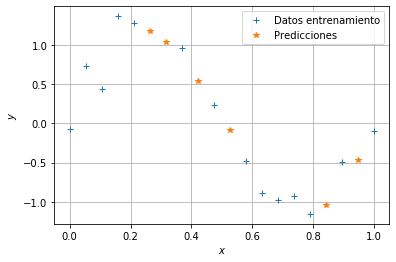

In [38]:
# Visualización del modelo
plt.plot(x_train, y_train, '+', label="Datos entrenamiento")
plt.plot(x_test, model.predict(x_test), '*', label="Predicciones")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [39]:
# Score sobre datos de entrenamiento
model.score(x_train, y_train)

0.9400145970378742

In [40]:
# Score sobre datos de prueba
model.score(x_test, y_test)

0.8067962212668535

In [41]:
# Definición del modelo
d = 10
model_ = Pipeline(steps=[
    ("poly", PolynomialFeatures(d)),
    ("reg", LinearRegression())
])

In [42]:
# Ajuste del modelo
model_.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

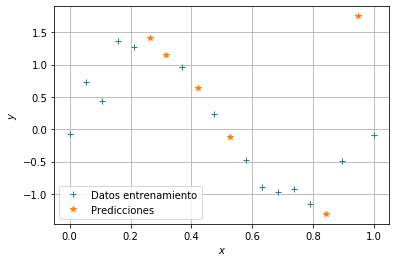

In [43]:
# Visualización del modelo
plt.plot(x_train, y_train, '+', label="Datos entrenamiento")
plt.plot(x_test, model_.predict(x_test), '*', label="Predicciones")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [44]:
# Score sobre datos de entrenamiento
model_.score(x_train, y_train)

0.9822344445405771

In [45]:
# Score sobre datos de prueba
model_.score(x_test, y_test)

-1.7163904665038108

### Overfitting

In [48]:
model.named_steps["reg"].coef_

array([  0.        ,  12.76509218, -37.46756757,  24.83549194])

In [49]:
model_.named_steps["reg"].coef_

array([ 0.00000000e+00,  6.35170198e+01, -1.76506364e+03,  2.16372490e+04,
       -1.38100181e+05,  5.14312642e+05, -1.18194650e+06,  1.69884484e+06,
       -1.48677181e+06,  7.24103864e+05, -1.50378588e+05])

### ¿Cómo lidiar con el overfitting? 

#### 1. Regularización

In [50]:
from sklearn.linear_model import Ridge

In [55]:
# Definición del modelo
d = 10
model_reg = Pipeline(steps=[
    ("poly", PolynomialFeatures(d)),
    ("reg", Ridge(alpha=0.001))
])

In [56]:
# Ajuste del modelo
model_reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

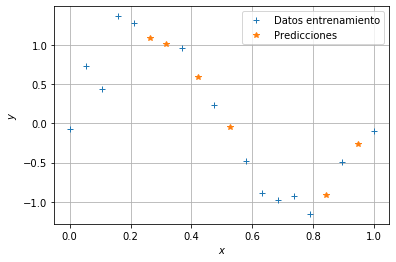

In [57]:
# Visualización del modelo
plt.plot(x_train, y_train, '+', label="Datos entrenamiento")
plt.plot(x_test, model_reg.predict(x_test), '*', label="Predicciones")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [59]:
# Score sobre datos de entrenamiento
model_reg.score(x_train, y_train)

0.9448730546776278

In [60]:
# Score sobre datos de prueba
model_reg.score(x_test, y_test)

0.8956180000849996

In [61]:
# Sin regularizacion
model_.named_steps["reg"].coef_

array([ 0.00000000e+00,  6.35170198e+01, -1.76506364e+03,  2.16372490e+04,
       -1.38100181e+05,  5.14312642e+05, -1.18194650e+06,  1.69884484e+06,
       -1.48677181e+06,  7.24103864e+05, -1.50378588e+05])

In [62]:
# Regularizado
model_reg.named_steps["reg"].coef_

array([  0.        ,   7.49031746, -14.3439377 ,  -5.58148081,
         2.50679998,   6.06543036,   6.16318692,   4.20988476,
         1.20827269,  -2.22509043,  -5.73661071])

#### 2. Más datos

In [63]:
# Generamos datos ficticios
N = 1000
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

In [64]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.3)

In [65]:
# Definición del modelo
d = 10
model_ = Pipeline(steps=[
    ("poly", PolynomialFeatures(d)),
    ("reg", LinearRegression())
])

In [67]:
# Ajuste del modelo
model_.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

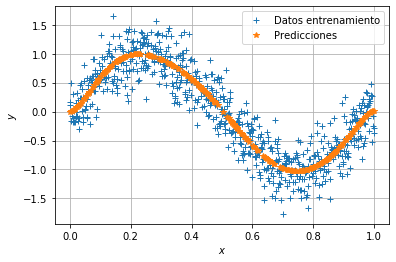

In [68]:
# Visualización del modelo
plt.plot(x_train, y_train, '+', label="Datos entrenamiento")
plt.plot(x_test, model_.predict(x_test), '*', label="Predicciones")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [69]:
# Score sobre datos de entrenamiento
model_.score(x_train, y_train)

0.8532241531576507

In [70]:
# Score sobre datos de prueba
model_.score(x_test, y_test)

0.8218168875421573

## 2. Distribución normal

Antes de entrar en detalles repasemos un poco la distribución normal.

### 2.1. Distribución normal univariada

Se dice que una VA distribuye normal si su función de densidad de probabilidad es:

$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}
$$

con parámetros $\mu \in \mathbb{R}$: media de la VA X, y $\sigma^2 \in \mathbb{R}_{\geq0}$: varianza de la VA X.

**Ejercicio.** Demostrar que:

1. 
$$
\int_{-\infty}^{\infty} \mathcal{N}(x|\mu, \sigma^2) = 1.
$$

2. 
$$
\mu = \arg \max_{x} \mathcal{N}(x|\mu, \sigma^2)
$$

¿Cómo luce esta densidad?

In [1]:
# Importar scipy.stats
from scipy import stats
# Importar numpy
import numpy as np
# Importar matplitlib.pyplot
from matplotlib import pyplot as plt

In [2]:
# Tres VA normales
X = stats.norm(loc=0, scale=1)
Y = stats.norm(loc=1, scale=1)
Z = stats.norm(loc=0, scale=3)

In [3]:
# Vector x para graficar
x = np.linspace(-10, 10, 1001)

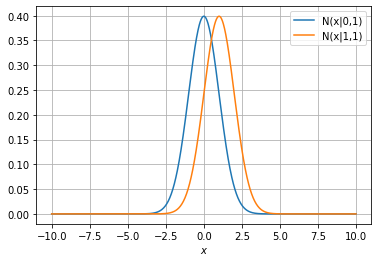

In [5]:
# Graficar
plt.plot(x, X.pdf(x), label=r'N(x|0,1)')
plt.plot(x, Y.pdf(x), label=r'N(x|1,1)')
plt.xlabel('$x$')
plt.grid()
plt.legend(loc="best")

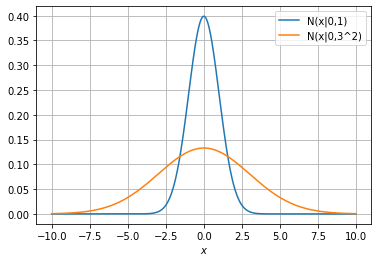

In [6]:
plt.plot(x, X.pdf(x), label=r'N(x|0,1)')
plt.plot(x, Z.pdf(x), label=r'N(x|0,3^2)')
plt.xlabel('$x$')
plt.grid()
plt.legend(loc="best")

## 3. Desde una perspectiva probabilística

Para modelar la incertidumbre en este tipo de relaciones, podemos suponer que el ruido aditivo sigue una densidad Gaussiana:

$$
y = \phi(x)^T w + \epsilon,
$$

con $\epsilon \sim \mathcal{N}(0, \beta^{-1})$.

De manera que

$$
p(y | x, w) = \mathcal{N}(y | \phi(x)^T w, \beta^{-1}),
$$

es decir, con la relación $\phi(x)^T w$ modela el valor esperado de la variable de salida $y$.

### Estimación de parámetros: Máxima verosimilitud

Para estimar los parámetros, escribimos entonces la función de verosimilitud:

$$
\mathcal{L}(w) = p(y | X, w) = \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}).
$$

Por tanto, la log verosimilitud es:

\begin{align}
l(w) & = \log \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \sum_{i=1}^{N} \log\mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \sum_{i=1}^{N} (y_i - \phi(x_i)^T w)^2 \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \left|\left|y - \Phi w\right|\right|^2,
\end{align}

donde:

$$
\Phi = \left[
    \begin{array}{ccc}
    - & \phi(x_1)^T  & - \\
    - & \phi(x_2)^T  & - \\
      & \vdots       &   \\
    - & \phi(x_N)^T  & - \\
    \end{array}
\right] \in \mathbb{R}^{N \times d}
$$

De esta manera, usando el principio de máxima verosimilitud, obtenemos que:

$$
\hat{w}_{MLE} = \arg \max_{w} l(w) = \arg \min_{w} \left|\left|y - \Phi w\right|\right|^2,
$$

justo como en mínimos cuadrados.

Observamos que la estimación de parámetros por máxima verosimilitud, explica nuestra intuición detrás de mínimos cuadrados.

Además, **una vez más concluimos que el enfoque de máxima verosimilitud nos puede traer problemas de overfitting**.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>